# <center>  What's on your plate? </center>

**"An EDA of Nutrients in Different Food Categories"**

<center><img alt="Insight logo" src="https://images.unsplash.com/photo-1550989460-0adf9ea622e2?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8N3x8ZnJ1aXRzJTIwYW5kJTIwdmVnZXRhYmxlc3xlbnwwfHwwfHx8MA%3D%3D" align="center" hspace="10px" vspace="10px" width="900" height="1100" ></center>

The project aims to analyze the nutrient values of food items in different categories. The dataset used is downloaded from Kaggle, and various Python libraries such as Pandas, Matplotlib, and Seaborn are used for data analysis and visualization. The project provides insights into the distribution of various nutrients such as protein, carbohydrates, fiber, etc., in different food categories. 

<a id="table"> </a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 20px 90px;">Table Of Content</h1>



* [1. Download the data](#1)
    
* [2. Data Preparation and Cleaning ](#2)
  
* [3. Exploratory Analysis and Visualization](#3)

* [4. Ask & Answer Questions ](#4)

* [4. Inferences and conclution](#5)

* [5.References and Future Work](#6)

 ##     <a id="1"></a> <a id="table"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Download the data</h1>  

Download and install and import necessary packages.

In [1]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od
source_url = "https://www.kaggle.com/datasets/sathyakrishnan12/nutrition-datasets"
od.download(source_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nnautiyal
Your Kaggle Key: ········


100%|██████████| 1.27M/1.27M [00:00<00:00, 77.0MB/s]

In [2]:
import os
os.listdir("nutrition-datasets")

['nutrition.csv']

In [3]:
# import liabraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 100)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install jovian --upgrade --quiet
project_name = "Nutrition-data-analysis"
import jovian
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nitinmedion/nutrition-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/nitinmedion/nutrition-data-analysis


'https://jovian.com/nitinmedion/nutrition-data-analysis'

##   <a id="2"></a>  <h1 style="background-color:red;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 50px;">Data Preparation and Cleaning </h1> 

In [5]:
# read & load the dataset into pandas dataframe
df = pd.read_csv("nutrition-datasets/nutrition.csv")

In [6]:
# printing the columns

for i in df.columns:
    print(i)

Unnamed: 0
name
serving_size
calories
total_fat
saturated_fat
cholesterol
sodium
choline
folate
folic_acid
niacin
pantothenic_acid
riboflavin
thiamin
vitamin_a
vitamin_a_rae
carotene_alpha
carotene_beta
cryptoxanthin_beta
lutein_zeaxanthin
lucopene
vitamin_b12
vitamin_b6
vitamin_c
vitamin_d
vitamin_e
tocopherol_alpha
vitamin_k
calcium
copper
irom
magnesium
manganese
phosphorous
potassium
selenium
zink
protein
alanine
arginine
aspartic_acid
cystine
glutamic_acid
glycine
histidine
hydroxyproline
isoleucine
leucine
lysine
methionine
phenylalanine
proline
serine
threonine
tryptophan
tyrosine
valine
carbohydrate
fiber
sugars
fructose
galactose
glucose
lactose
maltose
sucrose
fat
saturated_fatty_acids
monounsaturated_fatty_acids
polyunsaturated_fatty_acids
fatty_acids_total_trans
alcohol
ash
caffeine
theobromine
water


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8789 non-null   int64 
 1   name                         8789 non-null   object
 2   serving_size                 8789 non-null   object
 3   calories                     8789 non-null   int64 
 4   total_fat                    8789 non-null   object
 5   saturated_fat                7199 non-null   object
 6   cholesterol                  8789 non-null   object
 7   sodium                       8789 non-null   object
 8   choline                      8789 non-null   object
 9   folate                       8789 non-null   object
 10  folic_acid                   8789 non-null   object
 11  niacin                       8789 non-null   object
 12  pantothenic_acid             8789 non-null   object
 13  riboflavin                   8789

**First lets do few thing befor analysis**

`This Project contains only some essentials vitamins & minerals`

* Dropping and selecting the columns/Rows which are not cover in this project
* Check whether any null values present inside the dataframe or not.`
* Rename the columns


In [8]:
df.columns

Index(['Unnamed: 0', 'name', 'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatt

Start with droping the columns which are note covered in this project

In [9]:
#  Drop the columns by drop method
#df.drop(columns=['col1', 'col2', 'col4'], inplace=True)

# Or you  make a new data frame and add then select columns inside it.

df = df[[
    # food
    'name',
    'serving_size',
    'calories',
    # vitamins
     'vitamin_a','vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e','carotene_beta','thiamin',

    # Protein & minerals
     'copper', 'irom', 'magnesium',
       'phosphorous', 'potassium', 'zink', 'protein','calcium',
    # carbs , fats & sugars
    'carbohydrate', 'fiber', 'sugars',
       'fat','total_fat','cholesterol','sodium']].copy()


we have to deal with name columns this cause some uncertainities. While doing EDA and visualization.

In [10]:
df['name'] = df['name'].str.replace(',', '\n')

# split the columns
#df[["Food","Type"]] = df["name"].str.split(",", n =1, expand=True,)

# drop the original Name columns
#df = df.drop("name",axis=1)

# reindexing the columns 
#df = df.reindex(columns=['Food', 'Type'] + list(df.columns[:-2]))




Check for the null value now

In [11]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [12]:
df.tail(1)

,name,serving_size,calories,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,carotene_beta,thiamin,copper,irom,magnesium,phosphorous,potassium,zink,protein,calcium,carbohydrate,fiber,sugars,fat,total_fat,cholesterol,sodium
8788,"Beef\n raw\n all grades\n trimmed to 0"" fat\n ...",100 g,121,6.00 IU,1.84 mcg,0.644 mg,0.0 mg,1.00 IU,0.24 mg,0.00 mcg,0.063 mg,0.042 mg,1.45 mg,12.00 mg,222.00 mg,319.00 mg,3.42 mg,23.37 g,13.00 mg,0.00 g,0.0 g,0.00 g,3.04 g,3g,60mg,53.00 mg


<center><b>Abbreviations Used in this Project</b></center>



| Column name   | Description                                                                                               |
|---------------|---------------------------------------------------------------------|
| Food          | Name of the Food                                                                                          |
| Svg_size_g    | Serving Size Gram                                                                                         |
| Ttl_fat_      | Total Fat                                                                                                 |
| Vit_e_mg      | Vitamin E (mg)                                                                                            |
| Vit_D_IU      | Vitamin D (IU)                                                                                            |
| Chol_(mg)     | Cholesterol (mg)                                                                                          |
| Vit_b6_mg     | Vitamin B6 is a water-soluble vitamin that is part of the B-vitamin family.                                |
| Vit_b12_mcg   | Vitamin B12 is a water-soluble vitamin that is part of the B-vitamin family.                                |
| Vit_a_iu      | Vitamin A is a fat-soluble vitamin that is part of the vitamin A family.                                   |
| B_carotene_mcg| Beta carotene is a fat-soluble vitamin that is part of the vitamin A family.                               |
| Fe_mg         | Iron                                                                                                      |
| Mg_mg         | Magnesium                                                                                                 |
| P_mg          | Phosphorous                                                                                               |
| K_mg          | Potassium                                                                                                 |
| zn_mg         | Zinc                                                                                                      |
| Protein_g     | Protein                                                                                                   |
| Carbs_g       | Carbohydrate                                                                                              |
| Fiber_g       | Fiber                                                                                                     |
| Sugars_g      | Sugars                                                                                                    |
| Fat_g         | Fat                                                                                                       |


In [13]:
df.rename(columns={"name":"Food","serving_size":"Svg_size_g",'total_fat':'Ttl_fat_g','cholesterol':'Chol_mg',"sodium":"Na_mg",'thiamin':'B1_mg','vitamin_a':'Vit_a_iu',"carotene_beta":'B_carotene_mcg',"vitamin_b12":'Vit_b12_mcg',
                   'vitamin_b6': 'Vit_b6_mg','vitamin_c':'Vit_c_mg','vitamin_d':'Vit_d_iu','vitamin_e':'Vit_e_mg','calcium':'Ca_mg','copper':'Cu_mg',
                   'irom':'Fe_mg','magnesium':'Mg_mg','phosphorous':'P_mg',"potassium":"K_mg","zink":'Zn_mg','protein':'Protein_g','carbohydrate':'Carbs_g','fiber':'Fiber_g','sugars':'Sugars_g','fat':'Fat_g'}, inplace = True)

In [14]:
df.dtypes

Food              object
Svg_size_g        object
calories           int64
Vit_a_iu          object
Vit_b12_mcg       object
Vit_b6_mg         object
Vit_c_mg          object
Vit_d_iu          object
Vit_e_mg          object
B_carotene_mcg    object
B1_mg             object
Cu_mg             object
Fe_mg             object
Mg_mg             object
P_mg              object
K_mg              object
Zn_mg             object
Protein_g         object
Ca_mg             object
Carbs_g           object
Fiber_g           object
Sugars_g          object
Fat_g             object
Ttl_fat_g         object
Chol_mg           object
Na_mg             object
dtype: object

In [15]:

# dealing with miniscule amounts
cols_to_clean = list(df.columns[2:])
df[cols_to_clean] = df[cols_to_clean].replace({"mg": "", "g": "","mc":"","IU":""}, regex=True).astype(float)

In [16]:
df.describe()

,calories,Vit_a_iu,Vit_b12_mcg,Vit_b6_mg,Vit_c_mg,Vit_d_iu,Vit_e_mg,B_carotene_mcg,B1_mg,Cu_mg,Fe_mg,Mg_mg,P_mg,K_mg,Zn_mg,Protein_g,Ca_mg,Carbs_g,Fiber_g,Sugars_g,Fat_g,Ttl_fat_g,Chol_mg,Na_mg
count,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000
mean,226.283878,676.320514,1.201716,0.261324,8.356548,14.560815,0.885576,141.716236,0.207929,0.167482,2.645764,32.262032,153.844123,265.251223,1.939745,11.345616,73.317328,22.121915,2.040073,6.756293,10.550794,10.556855,38.723063,306.353851
std,169.862001,3694.739553,4.271908,0.467713,65.624854,123.643892,3.813260,1030.755350,0.510359,0.543426,5.661046,55.837795,202.198353,371.443524,3.335766,10.530602,199.850425,27.266261,4.269181,13.718890,15.814870,15.818247,117.358944,939.220468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91.000000,0.000000,0.000000,0.035000,0.000000,0.000000,0.000000,0.000000,0.030000,0.028000,0.490000,10.000000,35.000000,111.000000,0.220000,2.380000,8.000000,0.050000,0.000000,0.000000,0.950000,1.000000,0.000000,36.000000
50%,191.000000,20.000000,0.070000,0.119000,0.000000,0.000000,0.120000,0.000000,0.077000,0.077000,1.310000,20.000000,129.000000,219.000000,0.800000,8.020000,19.000000,9.340000,0.400000,0.490000,5.130000,5.100000,2.000000,84.000000
75%,337.000000,208.000000,1.270000,0.357000,2.400000,1.000000,0.460000,2.000000,0.227000,0.140000,2.570000,29.000000,215.000000,329.000000,2.660000,19.880000,63.000000,34.910000,2.400000,6.050000,13.720000,14.000000,65.000000,396.000000
max,902.000000,100000.000000,98.890000,12.000000,2732.000000,10000.000000,149.400000,42891.000000,23.375000,15.050000,123.600000,781.000000,9918.000000,16500.000000,90.950000,88.320000,7364.000000,100.000000,79.000000,99.800000,100.000000,100.000000,3100.000000,38758.000000


One last time check for nan values

In [17]:
df.columns[df.isna().any()]

Index([], dtype='object')

**Check for Duplicate**

In [18]:
df.duplicated(subset=["Food"]).sum() 

0

In [19]:
df.head()

,Food,Svg_size_g,calories,Vit_a_iu,Vit_b12_mcg,Vit_b6_mg,Vit_c_mg,Vit_d_iu,Vit_e_mg,B_carotene_mcg,B1_mg,Cu_mg,Fe_mg,Mg_mg,P_mg,K_mg,Zn_mg,Protein_g,Ca_mg,Carbs_g,Fiber_g,Sugars_g,Fat_g,Ttl_fat_g,Chol_mg,Na_mg
0,Cornstarch,100 g,381.0,0.0,0.00,0.000,0.0,0.0,0.00,0.0,0.000,0.050,0.47,3.0,13.0,3.0,0.06,0.26,2.0,91.27,0.9,0.00,0.05,0.1,0.0,9.0
1,Nuts\n pecans,100 g,691.0,56.0,0.00,0.210,1.1,0.0,1.40,29.0,0.660,1.200,2.53,121.0,277.0,410.0,4.53,9.17,70.0,13.86,9.6,3.97,71.97,72.0,0.0,0.0
2,Eggplant\n raw,100 g,25.0,23.0,0.00,0.084,2.2,0.0,0.30,14.0,0.039,0.081,0.23,14.0,24.0,229.0,0.16,0.98,9.0,5.88,3.0,3.53,0.18,0.2,0.0,2.0
3,Teff\n uncooked,100 g,367.0,9.0,0.00,0.482,0.0,0.0,0.08,5.0,0.390,0.810,7.63,184.0,429.0,427.0,3.63,13.30,180.0,73.13,8.0,1.84,2.38,2.4,0.0,12.0
4,Sherbet\n orange,100 g,144.0,46.0,0.13,0.023,2.3,0.0,0.01,1.0,0.027,0.028,0.14,8.0,40.0,96.0,0.48,1.10,54.0,30.40,1.3,24.32,2.00,2.0,1.0,46.0


Now add a category column that contains a specific string that matches the `Food` name for the better analysis of this data

In [20]:
# create a dictionary of food categories and their corresponding keywords
categories = {
    'Vegetables': ['broccoli', 'spinach', 'kale', 'carrots', 'tomatoes', 'bell peppers', 'cucumbers', 'zucchini', 'eggplant', 'cauliflower', 'cabbage', 'onions', 'sweet potatoes', 'green beans', 'peas', 'asparagus', 'Brussels sprouts', 'artichokes', 'beets', 'radishes'],
    'Meat': ['beef', 'pork', 'lamb', 'goat', 'chicken', 'turkey', 'duck','goose', 'rabbit', 'bison'],
    'Poultry': ['chicken', 'turkey', 'duck', 'quail', 'goose', 'pigeon', 'pheasant'],
    'Fat food': ['butter', 'cheese', 'lard', 'margarine', 'shortening'],
    'Dairy Products': ['milk', 'yogurt', 'cheese', 'cream', 'butter', 'ice cream', 'sour cream', 'cottage cheese'],
    'Drinks and alcohol': ['water', 'coffee', 'tea', 'soda', 'juice', 'beer', 'wine', 'liquor'],
    'Dessert Sweets': ['cake', 'pie', 'chocolate', 'candy', 'cookies', 'ice cream'],
    'Seeds and Nuts': ['almonds', 'cashews', 'peanuts', 'pistachios', 'walnuts', 'sesame seeds', 'flax seeds', 'chia seeds']
}

# create a dictionary of food categories 

df['Category'] = ''

# iterate through each food category and assign the corresponding category to the food items
for category, keywords in categories.items():
    df.loc[df['Food'].str.contains('|'.join(keywords), case=False), 'Category'] = category

In [21]:
# Now delete the remaining rows which are not in the categories.
df['Category'].replace('', np.nan, inplace=True)

df.dropna(subset=["Category"], inplace = True)
df.reset_index(drop=True , inplace = True)

In [22]:
df["Category"].value_counts()

Meat                  1336
Drinks and alcohol    1023
Dairy Products         774
Poultry                659
Dessert Sweets         659
Vegetables             254
Fat food                70
Seeds and Nuts          56
Name: Category, dtype: int64

##      <a id="3"></a>  <h1 style="background-color:red;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 50px;">Exploratory Analysis and Visualization </h1> 

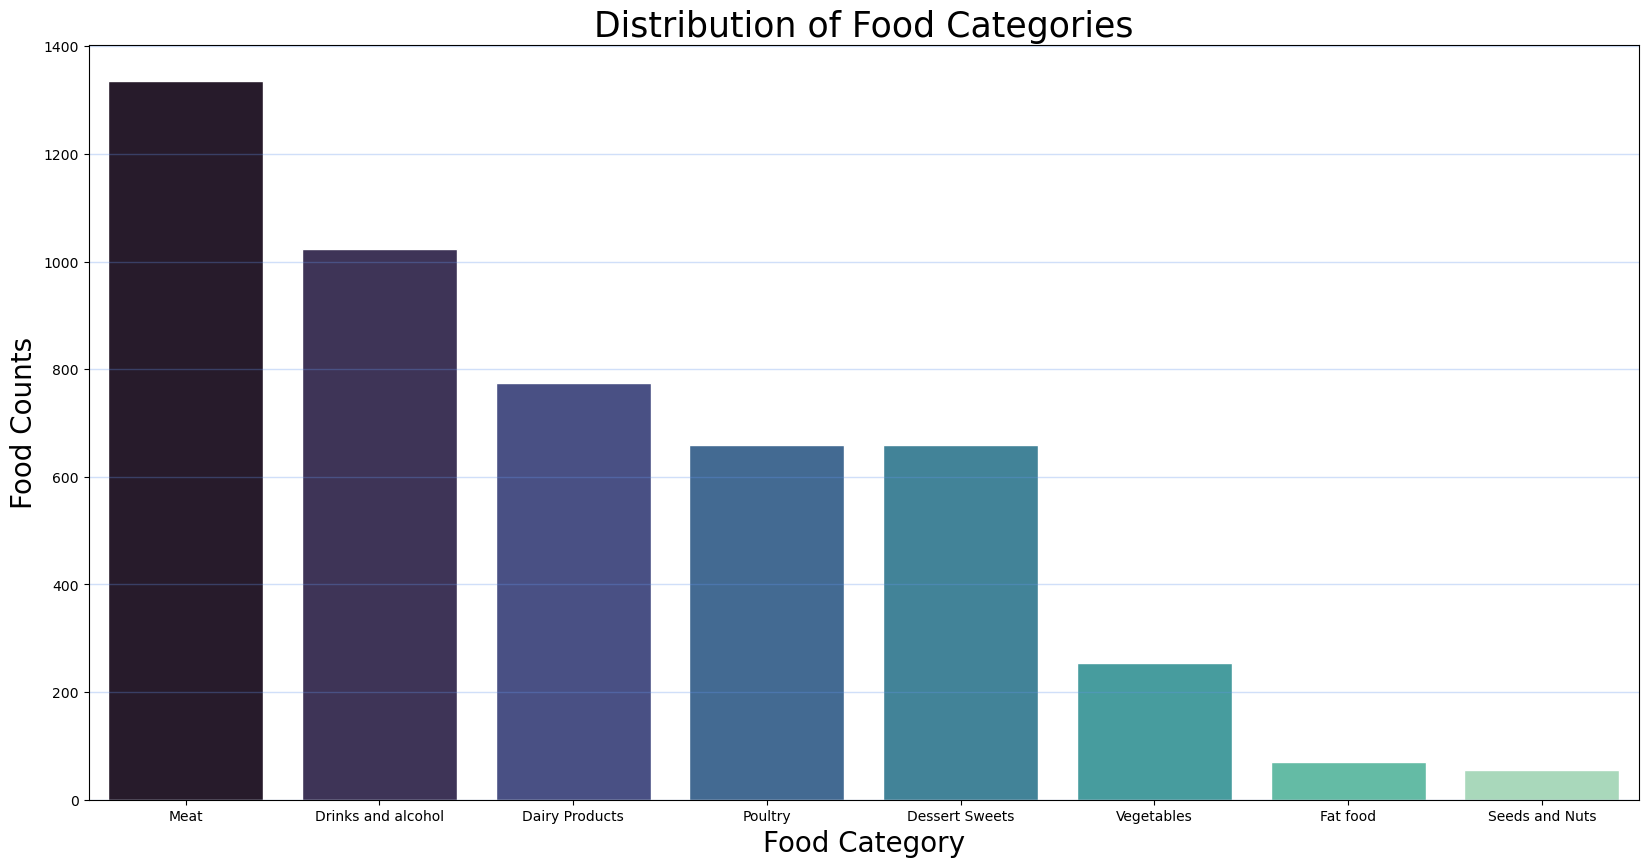

In [23]:
fig, ax = plt.subplots(figsize = (20,10), dpi = 100)
sns.set(style="whitegrid")
Category_count = df['Category'].value_counts()
ax = sns.barplot(x=Category_count.index,y=Category_count.values ,palette='mako');

# set x & y label
ax.set_ylabel('Food Counts', fontsize = 20)
ax.set_xlabel("Food Category", fontsize = 20)

# grid color
ax.grid(color='#6495ed', linewidth=1, axis='y', alpha=.3)

# set title
ax.set_title("Distribution of Food Categories", fontsize = 25)

plt.show()

Majority of food items belong to the `Meat` category, followed by `Drinks and alcohal` and `Dairy Products`. The `Dessert Sweets` and `Poultry` categories also have a significant number of food items.

On the other hand, the `Vegetables`, `Fat food`, and `Seeds and Nuts` categories have a relatively small number of food items in the dataset.

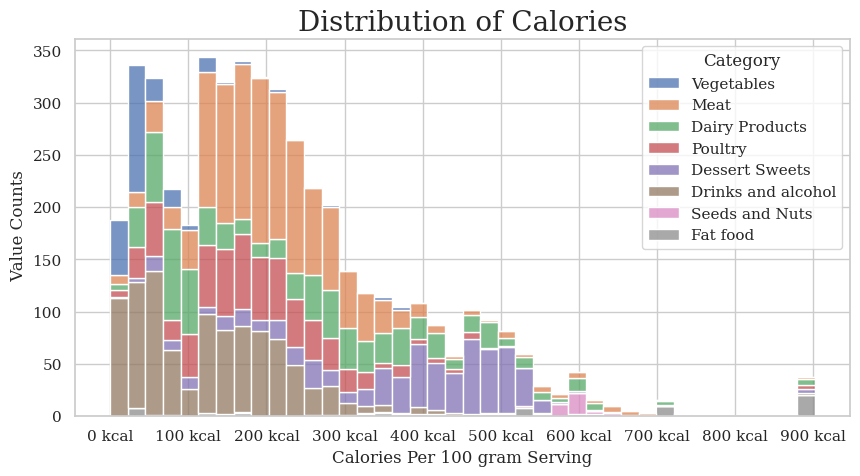

In [24]:


# create a new dataframe with only the necessary columns
Calories_df = df[['Category', 'calories']]

# create a histogram for each food category
plt.rc('font', family='serif', size=12)
fig, ax = plt.subplots(figsize = (10,5), dpi = 100)
ax = sns.histplot(data=df, x='calories', hue='Category', multiple='stack')

# set title & labels
ax.set_title("Distribution of Calories", fontsize = 20)
ax.set_xlabel("Calories Per 100 gram Serving")
ax.set_ylabel(" Value Counts")
ax.set_xticks(np.arange(0,1000,100))

# set x-tick labels to show "kcal"
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks, [f"{int(x)} kcal" for x in x_ticks])

plt.show()

**Insight**

Based on the above Histograph plot of calorie values for each food category, some observation are :-

* The majority of the Meat item fall in the range of 150 to 300 kcal per 100 g serving.
* Poultry items are mostly in the range of 150-200 kcal per 100g serving with some outliers above 300 kcal
* Dairy Products have a wide range of calorie counts , with many items falling in the range
* Suprisingly desserts sweets are in the wide range 200 to 500 kcal per 100 gram serving
* Fat food items have a high range of calories value,with most numbers are falling above 500 or some are over 800 kcal per 100 gram servings.
* Vegetables have a low range of calories values,with most item falling below 100 kcal .

Overall, it can be concluded that different food categories have varying ranges of calories values,with some category having a wide range some have a naroow range. It is important to be aware of the calorie content of foods when making dietary choices

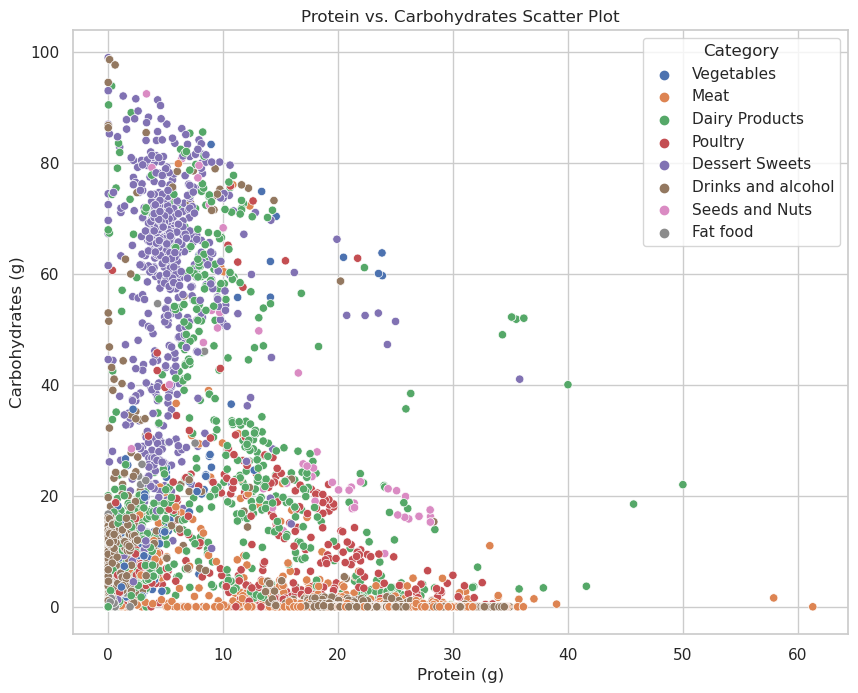

In [25]:

# create a scatter plot of protein vs. carbohydrates
plt.rc('font', family='sans-serif', size=12)
plt.subplots(figsize = (10,8), dpi = 100)
sns.scatterplot(x='Protein_g',hue = 'Category', y='Carbs_g', data=df)

# set the title and x and y axis labels

plt.title('Protein vs. Carbohydrates Scatter Plot')
plt.xlabel('Protein (g)')
plt.ylabel('Carbohydrates (g)')

#

# show the plot
plt.show()


**Insight**

Based on the above scatter plot , we can see that
- The meat category has a high concentration of protein and relatievely low carbs, with some outliers that have high carbs.
- Vegetables has a wide range of carbs, with a maximum of aroung 40-80 g , and a relatievely low concentration.
- The poultry category has a relatively low concentration of carbs,with most of the data points having below 40 and a high no of protein(g) per 100 gram serving
- The drinks and alcohal category are most in the range of below 20 carbs and relatievely low concentration of Protein .But some drinks has protein obviously they are juices.
- The dairy products category has a wide range of nutrient value , with some outliers having high protein and some having high carbs

    `Overall, scatetr plot shows that there is an wide range of nutrient value accross different food category.The meat category is high in protein , whereas as vegetables are high in carbs, and poultry is relatively low in carbs and high in protein.While the dairy category has a wide range of nutrient value`

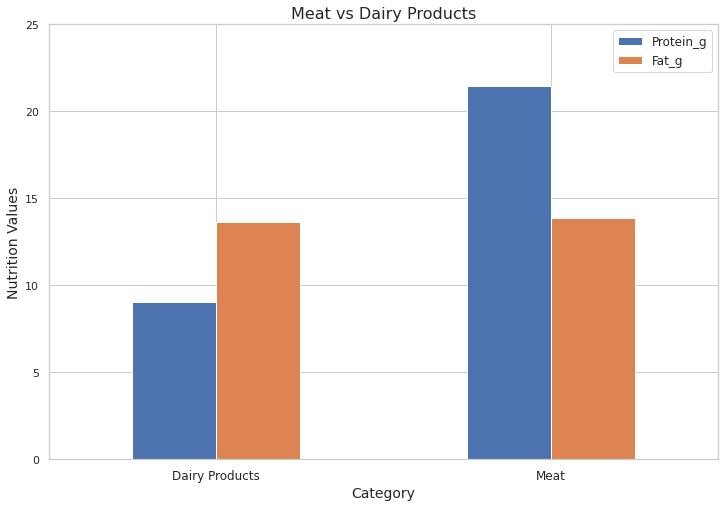

In [26]:
# filter the dataframe for Meat and Vegetables categories
meat_vegetables_df = df[df["Category"].isin(["Dairy Products", "Meat"])]

# group the filtered dataframe by Category and calculate mean values of calories, protein, and fat
grouped_df = meat_vegetables_df.groupby("Category")[["Protein_g", "Fat_g"]].mean()

grouped_df.plot(kind="bar", figsize=(12,8))
plt.title("Meat vs Dairy Products", fontsize=16)
plt.yticks(np.arange(0,30,5))
plt.ylabel("Nutrition Values", fontsize=14)
plt.xlabel("Category", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(fontsize=12)
plt.show()

**Insight**

Based on tha analysis of the Meat and dairy products categories.it can observed that meat are slightly higher protein compared to the dairy products .On the other hand , dairy products are slightly higher in fat compared to meat products

This suggest that individuall looking for high protein diet may prefer Meat products.
While those looking to substitute protein with other food option can consider dairy products.

`However, it is important dairy prducts are also high in fat content consider this data 100gram of per seving`

individuals should be mindful of their overall nutrient intake and consider low-fat dairy options if necessary.

In [27]:
df.columns

Index(['Food', 'Svg_size_g', 'calories', 'Vit_a_iu', 'Vit_b12_mcg',
       'Vit_b6_mg', 'Vit_c_mg', 'Vit_d_iu', 'Vit_e_mg', 'B_carotene_mcg',
       'B1_mg', 'Cu_mg', 'Fe_mg', 'Mg_mg', 'P_mg', 'K_mg', 'Zn_mg',
       'Protein_g', 'Ca_mg', 'Carbs_g', 'Fiber_g', 'Sugars_g', 'Fat_g',
       'Ttl_fat_g', 'Chol_mg', 'Na_mg', 'Category'],
      dtype='object')

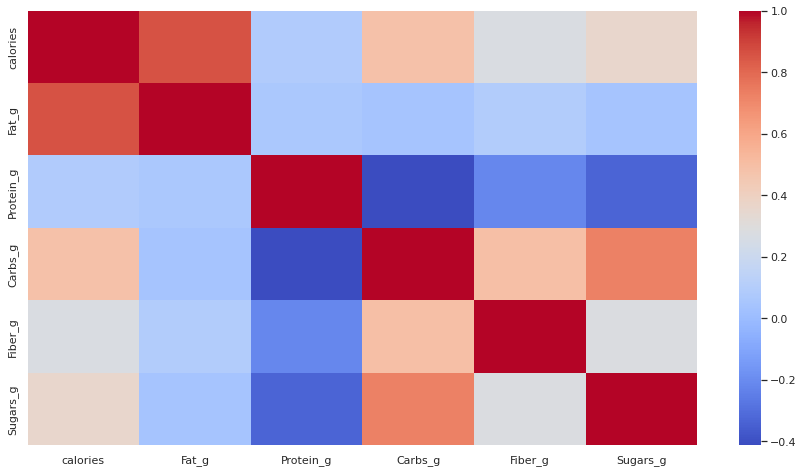

In [28]:

# create a correlation matrix of the nutrients
corr_matrix = df[['calories', 'Fat_g', 'Protein_g', 'Carbs_g', 'Fiber_g', 'Sugars_g']].corr()

# plot the correlation matrix as a heat map using seaborn
plt.figure(figsize=(15,8))
ax = sns.heatmap(corr_matrix, cmap='coolwarm')

plt.show()

**Insight**

- The correlation heatmap shows that there is a negative correlation (-0.4) dark blue color between carbohydrates and food.As noted in the scatter plot of protein vs. carbohydrates, higher protein foods tend to have lower levels of carbohydrates.

- Similarly, there is a weak negative correlation between protein and fat (-0.2), indicating that foods high in protein tend to be lower in fat.

- On the other hand, there is a strong positive correlation between calories and fat (0.8), which means that high-calorie foods tend to be high in fat. 

- Positive correlation between carbs and sugars (0.6), suggesting that foods high in carbs often contain high levels of sugars.

##    <a id="4"></a> <h1 style="background-color:red;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 50px;"> Ask & Answer Questions </h1> 

### **Q. what are the top categories from high to low protein?"**

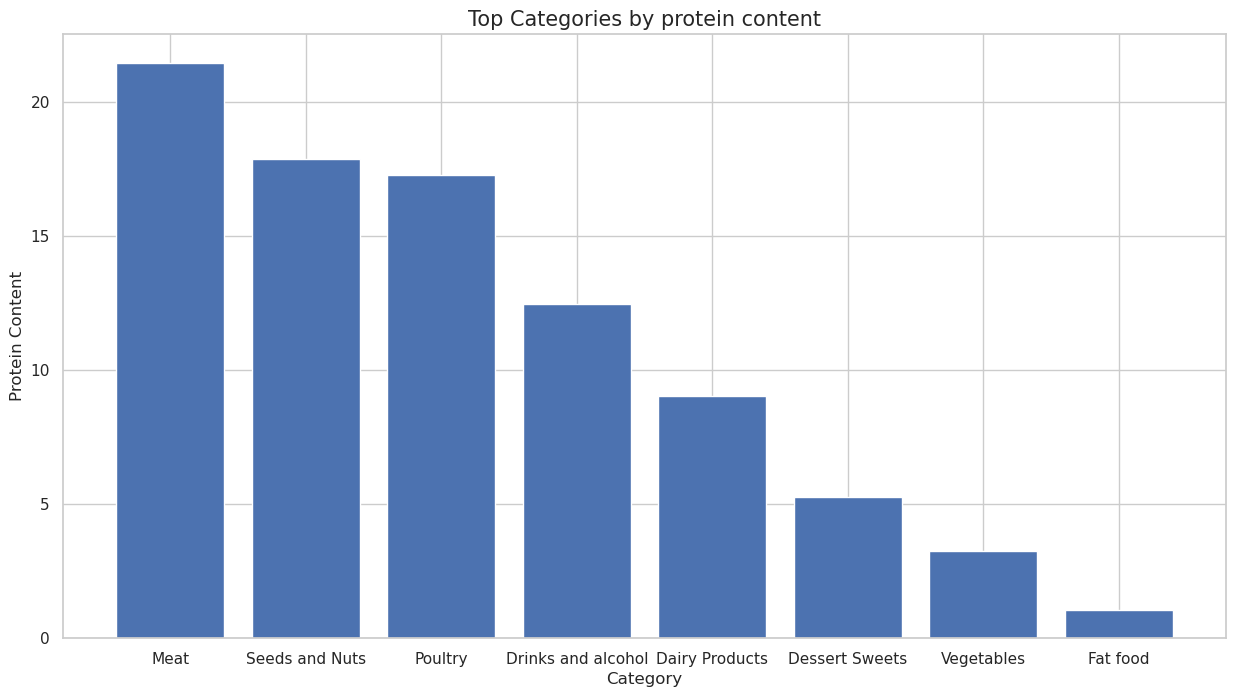

In [29]:
grouped_by = df.groupby("Category")["Protein_g"].mean()

sorted_series = grouped_by.sort_values(ascending=False)
plt.subplots(figsize = (15,8), dpi = 100)
plt.bar(sorted_series.index,sorted_series.values,)
plt.xlabel("Category")
plt.ylabel("Protein Content")
plt.title("Top Categories by protein content", size=15)

plt.show()

* Meat, seeds and nuts, and poultry are the top three categories with the highest protein content. This suggests that these foods are good sources of protein for individuals who are looking to increase their protein intake.

* It is interesting to note that drinks and alcohol are also among the top categories with high protein content. This could be due to the fact that some drinks, such as protein shakes and smoothies, are specifically designed to provide high amounts of protein.

* Dessert sweets, vegetables, and fat food are among the categories with the lowest protein content. This suggests that individuals who are looking to increase their protein intake should focus on incorporating more foods from the top categories into their diet.

### **Q: What are the top 5 food items with the highest protein content?**

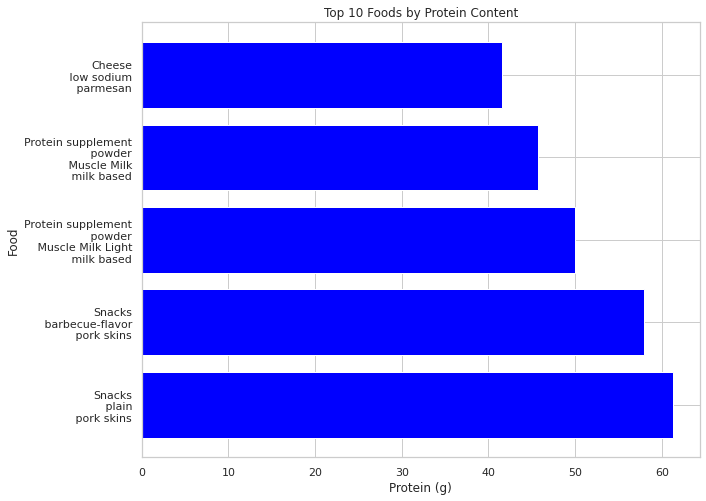

In [30]:
high_protein_df = df[df["Protein_g"] > 20]

top_5 = high_protein_df.sort_values("Protein_g",ascending=False).head(5)

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top_5['Food'], top_5['Protein_g'], color='blue')

# set the axis labels and title
plt.xlabel("Protein (g)")
plt.ylabel("Food")
plt.title("Top 10 Foods by Protein Content")

plt.show()

**Insights** \
The bar plot represents the top 5 food items with the highest protein content. It shows that snacks plain pork skins have the highest protein content, followed by Snacks barbecue flavor pork skins, protein supplement powder muscle milk-based, protein supplement powder muscle milk-based, and cheese low sodium parmesan. It is interesting to note that all of these items belong to the snacks and supplement category. This suggests that people who want to increase their protein intake tend to rely on supplements and snacks rather than whole foods. It is also worth noting that these items are high in protein but may not necessarily be healthy due to their high fat content. Therefore, it is important to balance protein intake with a variety of other healthy foods.

### **Q Which food categories are the highest sources of Minerals ?**

In [31]:
df.columns

Index(['Food', 'Svg_size_g', 'calories', 'Vit_a_iu', 'Vit_b12_mcg',
       'Vit_b6_mg', 'Vit_c_mg', 'Vit_d_iu', 'Vit_e_mg', 'B_carotene_mcg',
       'B1_mg', 'Cu_mg', 'Fe_mg', 'Mg_mg', 'P_mg', 'K_mg', 'Zn_mg',
       'Protein_g', 'Ca_mg', 'Carbs_g', 'Fiber_g', 'Sugars_g', 'Fat_g',
       'Ttl_fat_g', 'Chol_mg', 'Na_mg', 'Category'],
      dtype='object')

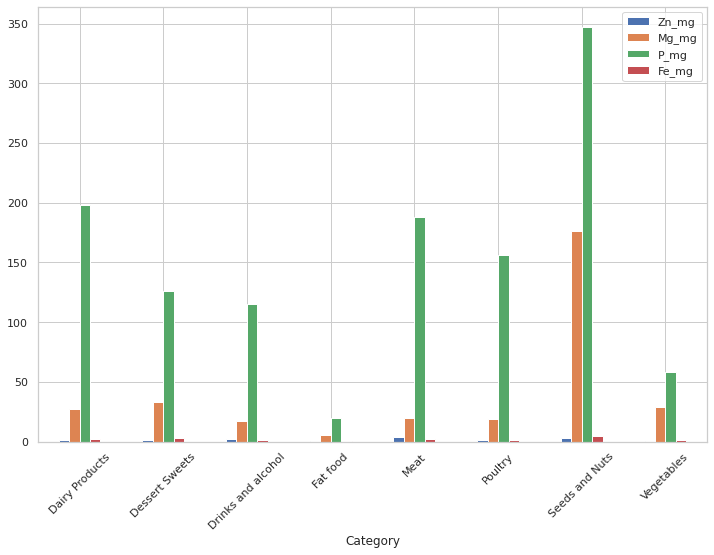

In [32]:
minerals_df = df[["Category","Zn_mg","Mg_mg","P_mg","Fe_mg"]]

grouped_df = minerals_df.groupby("Category").mean()

grouped_df.plot(kind="bar", figsize=(12,8))
plt.xticks(rotation=45)

plt.show()

This shows that seeds and nuts are the highest sources of both potassium and magnesium. Meat is also a good source of potassium, but not as high as seeds and nuts. Dairy products, especially milk and cheese, are good sources of Potasssium but not as high in potassium as seeds and nuts

### **Q. what are the top categories from high to low Calories?"**

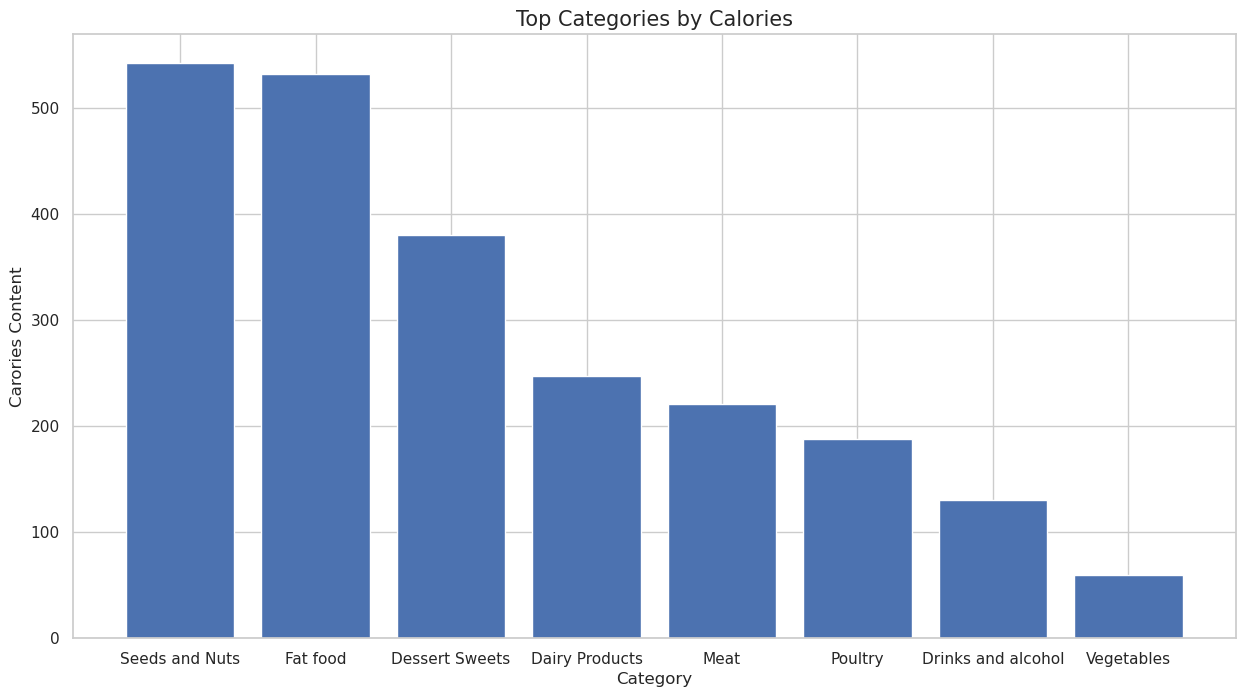

In [33]:
grouped_by = df.groupby("Category")["calories"].mean()

sorted_series = grouped_by.sort_values(ascending=False)
plt.subplots(figsize = (15,8), dpi = 100)
plt.bar(sorted_series.index,sorted_series.values,)
plt.xlabel("Category")
plt.ylabel("Carories Content")
plt.title("Top Categories by Calories", size=15)

plt.show()

Insights based on the bar plot:

* The highest calorie category is seeds and nuts, which may come as a surprise to some people who think of these foods as healthy snacks.
* The fact that fat foods are the second-highest calorie category may not be surprising to many people, as these foods are often associated with high calorie content.
* Dessert sweets being the third-highest calorie category is also not surprising, as these foods are often high in sugar and fat.
* Dairy products are relatively high in calories compared to other food categories, which may be unexpected for some people who view dairy as a healthy source of calcium.
* Meat and poultry are also high in calories, which may be expected for some people who associate these foods with protein and energy.
* Finally, drinks and alcohol are the lowest calorie category, which may be expected for some people who think of liquid calories as less filling or satisfying than solid food. However, it's worth noting that some alcoholic beverages can be high in calories, especially if they contain added sugar or mixers.

### **Q: Create a Dataframe Category with most fiber**

In [34]:
top_fiber = df.groupby('Category')['Fiber_g'].mean().nlargest(10)

top_fiber_df = top_fiber.reset_index(name='Mean Fiber (g)').head(10)
top_fiber_df

,Category,Mean Fiber (g)
0,Seeds and Nuts,8.573214
1,Vegetables,2.880709
2,Dessert Sweets,2.502731
3,Dairy Products,1.291602
4,Fat food,0.458571
5,Poultry,0.433536
6,Drinks and alcohol,0.336755
7,Meat,0.126347


In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nitinmedion/nutrition-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/nitinmedion/nutrition-data-analysis


'https://jovian.com/nitinmedion/nutrition-data-analysis'

##   <a id="5"></a> <h1 style="background-color:red;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 50px;">  Inferences and conclution </h1> 


The main aim of the project is to analyze the nutritional value of food items across different categories. Through our analysis, we found that the meat category has a high concentration of protein, whereas seeds and nuts are rich in fiber. Categories such as fat foods and desserts are high in calories. Our conclusions are based on analyzing various food categories. 

we can conclude that different food categories have different nutrient compositions, and it's important to consider these differences when planning a balanced diet. By identifying the categories that are rich in specific nutrients, we can also make informed choices about the types of food we consume to meet our nutritional needs. Overall, this project provides valuable insights into the nutrient composition of different food categories and can be useful for both individuals and professionals in the food and health industries.

